\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}
\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center}

# 1. {-}

## (a)(e) {-}

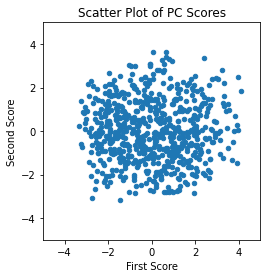

In [1]:
from sklearn.decomposition import PCA
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt

threes = pd.read_csv('threes.csv')
# threes -= threes.mean()
pca = PCA(n_components=4).fit(threes)
score = DataFrame(pca.transform(threes), columns=['1st', '2nd', '3rd', '4th'])

fig, ax = plt.subplots(1, 1)
score.plot(kind='scatter', x='1st', y='2nd', ax=ax)
ax.set(aspect=1, xlim=(-5, 5), ylim=(-5, 5), title='Scatter Plot of PC Scores', xlabel='First Score', ylabel='Second Score')
plt.show()

Below are the first 4 PCs presented as images. For PC1, the black and white pixels in the right part indicates that PC1 is moving the digit left and right in the image. For PC2, although blur, the black pixels surrounding the white ones indicates that PC2 controls the thickness of the digit. Those are consistent with the observation from (b) and (c).

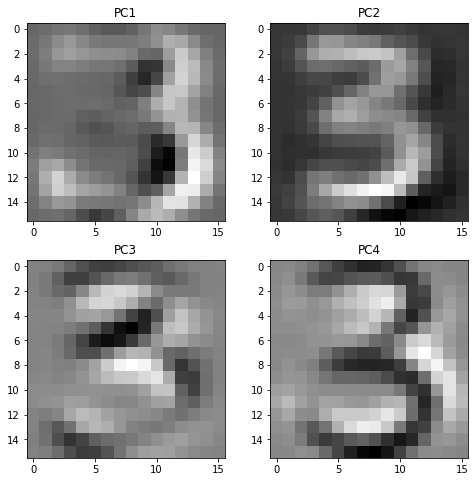

In [2]:
from quantile_helper import quantile_grid

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(pca.components_[i].reshape(16, 16), cmap='gray')
    ax.set(title='PC%s'%(i+1))
    
plt.show()

## (b) {-}

The red lines are the 5th, 25th, 50th, 75th and 95th of the first and second PC scores, respectively. These lines cross at 25 points which form a grid of digits, whose images are presented below. 

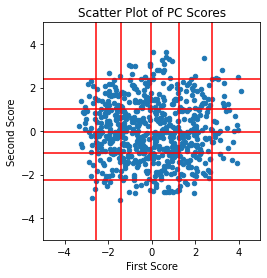

In [3]:
from sklearn.decomposition import PCA
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]

fig, ax = plt.subplots(1, 1)
score.plot(kind='scatter', x='1st', y='2nd', ax=ax)
ax.set(aspect=1, xlim=(-5, 5), ylim=(-5, 5), title='Scatter Plot of PC Scores', xlabel='First Score', ylabel='Second Score')
for percentile in percentiles:
    ax.axhline(y=np.percentile(score['2nd'], 100*percentile), xmin=-5, xmax=5, c='r')
    ax.axvline(x=np.percentile(score['1st'], 100*percentile), ymin=-5, ymax=5, c='r')
    
plt.show()

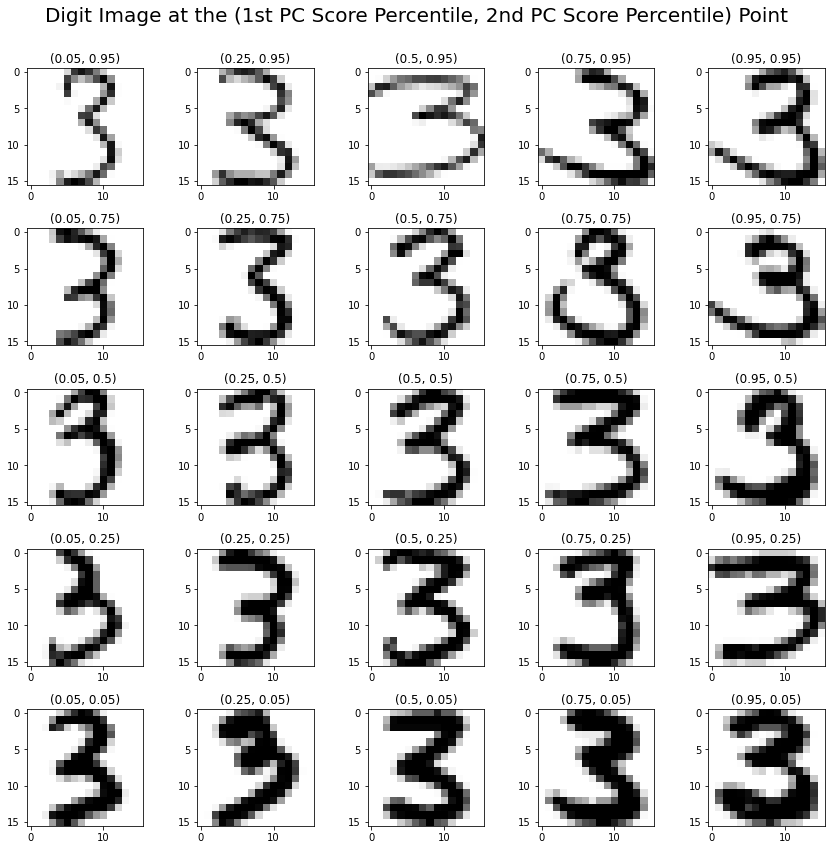

In [4]:
from quantile_helper import quantile_grid

percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]
indices = quantile_grid(score['1st'], score['2nd'], percentiles)

fig, axs = plt.subplots(5, 5, figsize=(12, 12))
for i, (idx, ax) in enumerate(zip(indices.ravel(), axs.ravel())):    
    ax.imshow(-threes.iloc[idx].values.reshape(16, 16), cmap='gray')
    ax.set(title='(%s, %s)'%(percentiles[i%5], percentiles[-1-i//5]))

plt.suptitle('Digit Image at the (1st PC Score Percentile, 2nd PC Score Percentile) Point\n', fontsize=20)
plt.tight_layout()
plt.show()

## (c) {-}

Roughly speaking, with a larger first PC score the digit is written wider and with a larger second PC score the digit is written thinner. 

## (d) {-}

We present the scree plot here. The PCA result suggests that 7 PCs are needed to explain 50% of the variance. To explain 90%, 52 PCs are needed. 

In [5]:
from pandas import Series

pca = PCA(n_components=256).fit(threes)

scree = Series(pca.explained_variance_ratio_.cumsum())
scree.index = scree.index + 1

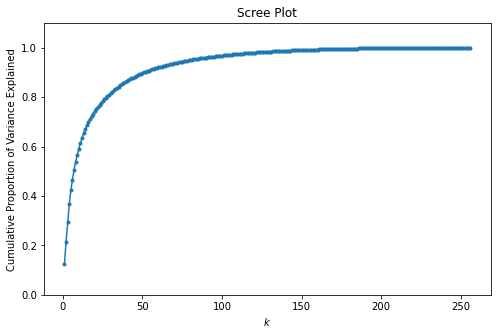

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
scree.plot(style='.-', ax=ax)
ax.set(xlabel='$k$', ylabel='Cumulative Proportion of Variance Explained', title='Scree Plot', ylim=(0, 1.1))
plt.show()

In [16]:
scree[scree > 0.5].index[0], scree[scree > 0.9].index[0]

(7, 52)

# 2. {-}

## (a) {-}

The $X$ data is a spiral curve. As it spirals out, the corresponding $y$ value gets larger and larger. If we draw $(x_1, x_2, y)$ points in 3D, they will be on a cone-shaped surface. A linear regression fitting a plane to the data will not work will

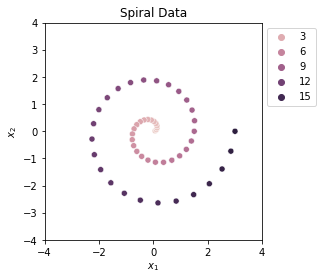

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spiral = pd.read_csv('spiral.csv')

fig, ax = plt.subplots(1, 1)
sns.scatterplot(data=spiral, x='x1', y='x2', hue='y', ax=ax)
ax.set(aspect=1, xlim=(-4, 4), ylim=(-4, 4), title='Spiral Data', xlabel='$x_1$', ylabel='$x_2$')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## (b) {-}

Fitting an OLS to the data. There is a clear pattern in the residuals vs. fitted values plot, indicating that linear regression is not a good model for the data. The MSE of the residuals is 20.68.

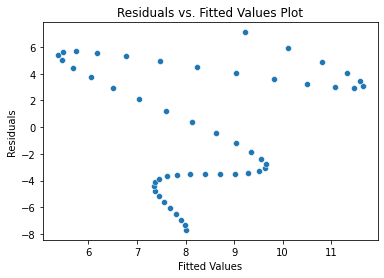


Training Error MSE:  20.684627445256858


In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

spiral = pd.read_csv('spiral.csv')

y = spiral.pop('y')
X = sm.add_constant(data=spiral)
ols = sm.OLS(endog=y, exog=X).fit()

fig, ax = plt.subplots(1, 1)
sns.scatterplot(x=ols.fittedvalues, y=ols.resid, ax=ax)
ax.set(xlabel='Fitted Values', ylabel='Residuals', title='Residuals vs. Fitted Values Plot')
plt.show()

print()
print('Training Error MSE: ', ols.mse_resid)

## (c)(d) {-}

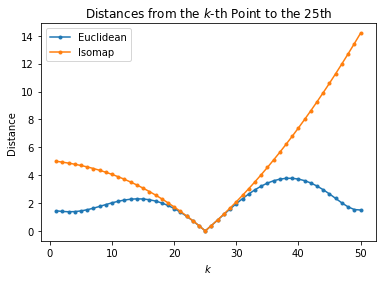

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from pandas import DataFrame

iso = Isomap(n_neighbors=1, n_components=2).fit(spiral)

dist = DataFrame({  'Euclidean': euclidean_distances(spiral)[24], 
                    'Isomap': iso.dist_matrix_[24]})
dist.index = dist.index + 1

fig, ax1 = plt.subplots(1, 1)
dist.plot(style='.-', ax=ax1)
ax1.set(title='Distances from the $k$-th Point to the 25th', xlabel='$k$', ylabel='Distance')
plt.show()

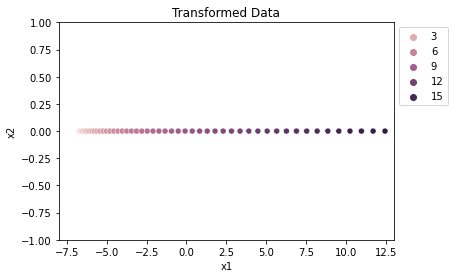

In [48]:
from pandas import DataFrame

transformed = DataFrame(iso.transform(spiral), columns=['x1', 'x2']).assign(y=y)

fig, ax = plt.subplots(1, 1)
sns.scatterplot(data=transformed, x='x1', y='x2', hue='y', ax=ax)
ax.set(xlim=(-8, 13), ylim=(-1, 1), title='Transformed Data')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## (e) {-}

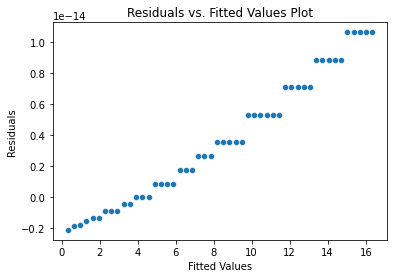


Training Error MSE:  3.1960930358804754e-29


In [49]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

X = sm.add_constant(data=transformed)
ols = sm.OLS(endog=y, exog=X).fit()

fig, ax = plt.subplots(1, 1)
sns.scatterplot(x=ols.fittedvalues, y=ols.resid, ax=ax)
ax.set(xlabel='Fitted Values', ylabel='Residuals', title='Residuals vs. Fitted Values Plot')
plt.show()

print()
print('Training Error MSE: ', ols.mse_resid)